In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Extract all features (except the last column) from the DataFrame for model training
X = df.iloc[:, 0:-1]  # Select all rows and columns except the last one (target variable)

# Extract the target variable (last column) for model training
y = df.iloc[:, -1]  # Select all rows and only the last column (target variable)


In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
# Import the train_test_split function for data splitting
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Target variable
    test_size=0.2,  # Allocate 20% of the data for testing
    random_state=1  # Ensure consistent splitting across runs
)


In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [ ]:
# Import the MinMaxScaler class for scaling features
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object to scale features to a range of 0 to 1
scaler = MinMaxScaler()

# Fit the scaler to the training features and transform them to the 0-1 range
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters from training data and apply them

# Transform the testing features using the same scaling parameters
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to testing data


In [ ]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [ ]:
# Import the TensorFlow library for machine learning tasks
import tensorflow as tf  # Import TensorFlow, often abbreviated as tf

# Import specific modules for building and working with neural networks
from tensorflow import keras  # Import the Keras API for model construction
from keras.models import Sequential  # Import the Sequential model class
from keras.layers import Dense  # Import layers for dense neural networks


In [ ]:
# Create an empty sequential model to stack layers sequentially
model = Sequential()

# Add the first hidden layer with 7 neurons and ReLU activation
model.add(Dense(7, activation='relu', input_dim=7))  # First hidden layer with 7 neurons

# Add the second hidden layer with 7 neurons and ReLU activation
model.add(Dense(7, activation='relu'))  # Second hidden layer with 7 neurons

# Add the output layer with 1 neuron and linear activation
model.add(Dense(1, activation='linear'))  # Output layer for regression (single continuous value)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Configure the model for training with a specific loss function and optimizer
model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
# Train the model on the training data, tracking progress and validating performance
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 0.5945 - val_loss: 0.5836
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5225 - val_loss: 0.4976
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.4412 - val_loss: 0.4113
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3552 - val_loss: 0.3201
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2721 - val_loss: 0.2323
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1911 - val_loss: 0.1480
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1180 - val_loss: 0.0828
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0645 - val_loss: 0.0463
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0367 - val_loss: 0.0310
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0246 - val_loss: 0.0278
Epoch 11/100
8/8 [=========

In [ ]:
# Generate predictions for the testing data using the trained model
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [ ]:
# Import the r2_score function for evaluating model performance
from sklearn.metrics import r2_score  # Import the R-squared metric for measuring accuracy

# Calculate the R-squared score to assess how well the model's predictions fit the true values
r2_score(y_test, y_pred)  # Compare true values and predicted values


0.7837776661104705

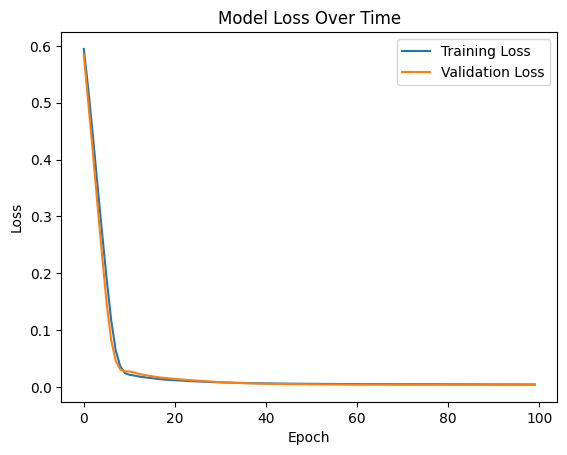

In [ ]:
# Import the plotting library for visualizing model performance
import matplotlib.pyplot as plt  # Import Matplotlib for creating visualizations

# Create a plot to visualize the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss

# Add labels and title to the plot
plt.xlabel('Epoch')  # Label the x-axis as 'Epoch'
plt.ylabel('Loss')  # Label the y-axis as 'Loss'
plt.title('Model Loss Over Time')  # Set the title of the plot
plt.legend()  # Display a legend to distinguish the lines
plt.show()  # Show the plot
